# Training Model

## Linear Regression

### The Normal equation

<span style="font-size: 1.2rem">$\hat{\theta} = (X^{T} . X)^{-1} . X^{T} . y = X^{+} . y$</span>
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is vector of target values.
* $X^{+}$ is pseudoinverse of X

In [1]:
import numpy as np

np.random.seed(42)
num_instances = 100
X = 2 * np.random.rand(num_instances, 1)
y = 3*X + 4 + np.random.randn(num_instances, 1)

In [2]:
X[:2], y[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[6.33428778],
        [9.40527849]]))

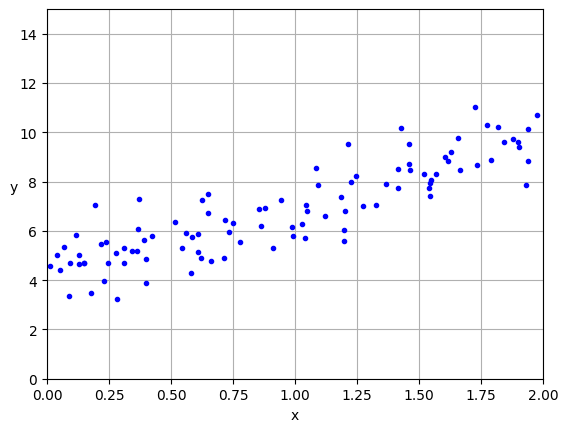

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

In [5]:
X[:2], X_b[:2]

(array([[0.74908024],
        [1.90142861]]),
 array([[1.        , 0.74908024],
        [1.        , 1.90142861]]))

In [6]:
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[4.21509616],
       [2.77011339]])

**NOTE**: pseudoinverse

In [7]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_new_pred = X_new_b @ best_theta
y_new_pred

array([[4.21509616],
       [9.75532293]])

In [10]:
y_pred = X_b @ best_theta
y_pred[:2]

array([[6.29013335],
       [9.48226901]])

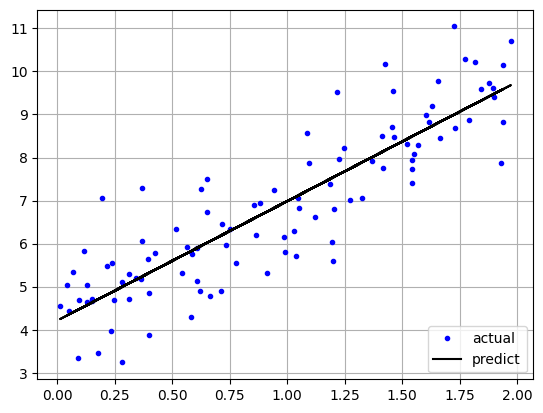

In [11]:
plt.plot(X, y, 'b.', label='actual')
plt.plot(X, y_pred, 'k-', label='predict')

plt.legend(loc='lower right')
plt.grid()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
best_theta

array([[4.21509616],
       [2.77011339]])

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### Computational Complexity

* Both the Normal equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regard to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory
* Also, once you have trained your linear regression model (using the Normal equation
or any other algorithm), predictions are very fast: the computational complexity is
linear with regard to both the number of instances you want to make predictions on
and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will take roughly twice as much time.
* Now we will look at a very different way to train a linear regression model, which is
better suited for cases where there are a large number of features or too many training
instances to fit in memory

## Gradient Descent

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XntrQhkSlmxC6QejBjEbww.png' style='width: 50%'/>

* When using gradient descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.
* Standardization (Z-score):
Subtracts the mean and divides by the standard deviation of each feature, resulting in a distribution with a mean of 0 and standard deviation of 1. 
* Min-Max scaling:
Scales features to a range between 0 and 1 by subtracting the minimum value and dividing by the range of the feature. 


### Batch Gradient Descent

### Stachostic Gradient Descent

### Mini Batch Gradient Descent

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called polynomial regression.


In [16]:
import numpy as np

np.random.seed(42)
num_instances = 100
X = 6 * np.random.rand(num_instances, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(num_instances, 1)

In [17]:
X[:2], y[:2]

(array([[-0.75275929],
        [ 2.70428584]]),
 array([[1.61761105],
        [8.06185944]]))

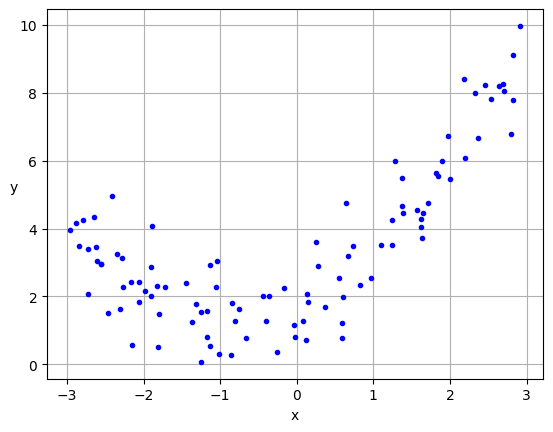

In [18]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.grid()
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
X_poly = poly_features.fit_transform(X)

In [21]:
X_poly[:2]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ]])

In [22]:
(-0.75275929) ** 2

0.566646548681304

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [25]:
X_new = np.linspace(-3, 3, num=num_instances).reshape(num_instances, 1)
X_new_poly = poly_features.transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)

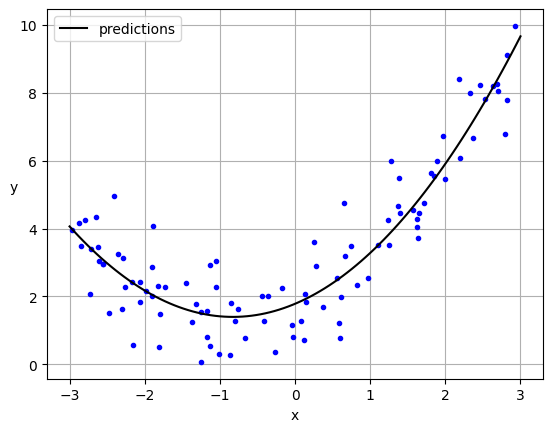

In [26]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new_pred, 'k-', label='predictions')

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.show()

* Note that when there are multiple features, polynomial regression is capable of
finding relationships between features, which is something a plain linear regression
model cannot do. This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features $a^{2}$, $a^{3}$, $b^{2}$, $b^{3}$, but also the combinations $ab$, $a^{2}b$, $ab^{2}$.
* PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing $(n + d)! / d!n!$ features, where $n!$
is the factorial of n, equal to $1 × 2 × 3 × ⋯ × n$. Beware of the
combinatorial explosion of the number of features!

## Learning Curves

* This high-degree polynomial regression model is severely overfitting the training
data, while the linear model is underfitting it. The model that will generalize best in
this case is the quadratic model, which makes sense because the data was generated
using a quadratic model. But in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?
    * Cross-validation
    * Learning curve

**[Tutorial: Learning Curves for Machine Learning in Python](https://www.dataquest.io/blog/learning-curves-machine-learning/)**

* Các giá trị của train_sizes:
    * Số nguyên: Nếu giá trị là số nguyên, nó đại diện cho số lượng mẫu huấn luyện tuyệt đối. Ví dụ: train_sizes=[100, 500, 1000] có nghĩa là mô hình sẽ được huấn luyện với 100, 500 và 1000 mẫu huấn luyện.
    * Số thực: Nếu giá trị là số thực (từ 0.0 đến 1.0), nó đại diện cho tỷ lệ mẫu huấn luyện so với tổng số mẫu. Ví dụ: train_sizes=[0.1, 0.3, 0.5] có nghĩa là mô hình sẽ được huấn luyện với 10%, 30% và 50% tổng số mẫu.

In [27]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, cv=5, train_sizes=np.linspace(0.01, 1, 40),
                                                        scoring='neg_root_mean_squared_error')

In [28]:
train_sizes

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [29]:
train_scores.shape

(40, 5)

In [30]:
train_errors, valid_errors = -train_scores.mean(axis=1), -valid_scores.mean(axis=1)

In [31]:
train_errors, train_errors.shape

(array([-0.00000000e+00,  3.40032635e-16,  1.21917626e+00,  1.55444643e+00,
         1.67538750e+00,  1.66043001e+00,  1.87246874e+00,  1.77194988e+00,
         1.73293770e+00,  1.77993138e+00,  1.76856361e+00,  1.77297636e+00,
         1.80788097e+00,  1.75305712e+00,  1.75504512e+00,  1.76723624e+00,
         1.75137416e+00,  1.78154893e+00,  1.75109417e+00,  1.76356708e+00,
         1.74809325e+00,  1.76183606e+00,  1.76981557e+00,  1.74279296e+00,
         1.73842344e+00,  1.77957666e+00,  1.79762131e+00,  1.78590497e+00,
         1.76560991e+00,  1.74736661e+00,  1.75519418e+00,  1.75392236e+00,
         1.76470581e+00,  1.74127910e+00,  1.74945465e+00,  1.75076847e+00,
         1.74085617e+00,  1.73672095e+00,  1.73915788e+00,  1.73796725e+00]),
 (40,))

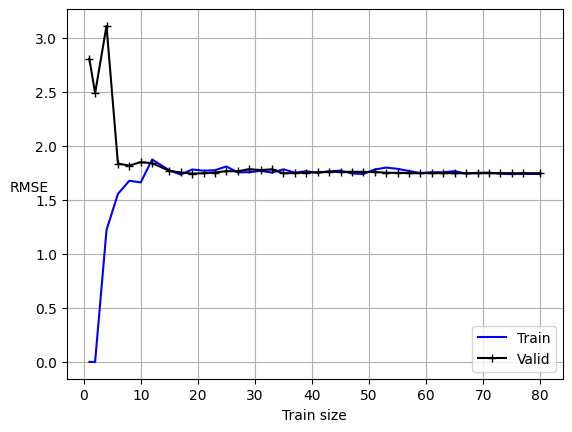

In [32]:
plt.plot(train_sizes, train_errors, 'b-', label='Train')
plt.plot(train_sizes, valid_errors, 'k-+', label='Valid')
plt.grid()
plt.legend(loc='lower right')
plt.ylabel('RMSE', rotation=0)
plt.xlabel('Train size', rotation=0)
plt.show()

**NOTE**
<hr/>

* The model is underfitting the training data, adding more training examples will not help. You need to use a **better model or come
up with better features**
* One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

poly_reg = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
    # RandomForestRegressor(max_leaf_nodes = 350)
)

In [34]:
train_sizes_poly, train_scores_poly, valid_scores_poly = learning_curve(poly_reg, X, y, cv=5, scoring='neg_root_mean_squared_error', 
                                                                        train_sizes=np.linspace(0.01, 1, 40))

In [35]:
train_errors_poly, valid_errors_poly = -train_scores_poly.mean(axis=1), -valid_scores_poly.mean(axis=1)

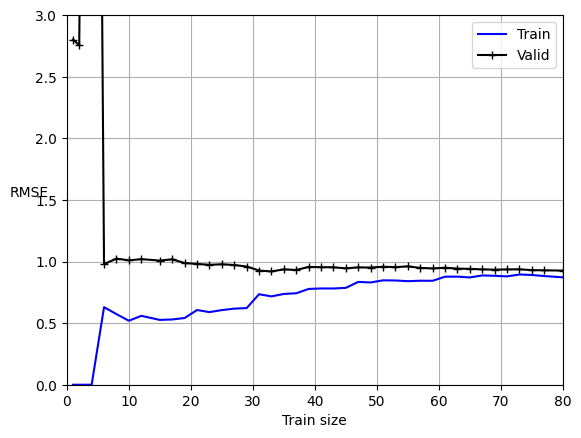

In [36]:
plt.plot(train_sizes_poly, train_errors_poly, 'b-', label='Train')
plt.plot(train_sizes_poly, valid_errors_poly, 'k-+', label='Valid')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Train size')
plt.ylabel('RMSE', rotation=0)
plt.axis([0, 80, 0, 3])
plt.show()

## Regularized Linear Models

### Ridge Regression

It is important to scale the data (e.g., using a StandardScaler)
before performing ridge regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

Ridge Regression Cost Function
$J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum_{i=1}^{n}\theta_{i}^2 $

Note that the bias term $\theta_{0}$
 is not regularized (the sum starts at i = 1, not 0)

In [37]:
np.random.seed(42)

In [38]:
num_instances = 20
X = 3 * np.random.rand(num_instances, 1)
y = 0.5*X + 1 + np.random.randn(num_instances, 1) / 1.5

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=0.1, solver='cholesky')

In [40]:
ridge_reg.coef_, ridge_reg.intercept_

(array([0.3828496]), array([0.97898394]))

* Trong mô hình Ridge của scikit-learn (sklearn), tham số `solver` quyết định phương pháp tối ưu hóa được sử dụng để tìm các hệ số của mô hình.
    * `auto`:
        * Đây là giá trị mặc định.
        * sklearn sẽ tự động chọn bộ giải phù hợp nhất dựa trên loại dữ liệu.
        * Nói chung, nó sẽ chọn 'svd' nếu dữ liệu dày đặc và 'lsqr' nếu dữ liệu thưa thớt.
    * `svd`:
        * Sử dụng phân tích giá trị đơn (Singular Value Decomposition) để tính toán các hệ số.
        * Phù hợp với hầu hết các trường hợp, đặc biệt là khi dữ liệu dày đặc.
        * Ổn định hơn về mặt số học.
    * `lsqr`:
        * Sử dụng thuật toán bình phương tối thiểu (Least Squares) để tìm giải pháp.
        * Phù hợp với dữ liệu thưa thớt (sparse data).
        * Có thể hiệu quả hơn `svd` khi dữ liệu lớn và thưa thớt.
    * `sag`:
        * Sử dụng Stochastic Average Gradient.
        * Phù hợp với dữ liệu lớn.
        * Nhanh hơn `svd` và `lsqr` trên các tập dữ liệu lớn.
        * Có thể cho kết quả nhanh hơn, nhưng có thể sẽ kém chính xác hơn.
    * `saga`:
        * Tương tự như `sag`, nhưng hỗ trợ cả điều chuẩn L1 (Lasso) và L2 (Ridge).
        * Phù hợp với dữ liệu lớn và khi bạn muốn sử dụng điều chuẩn L1.
        * Saga được cải thiện từ `sag`, và hỗ trợ thêm một vài tối ưu.
    * `cholesky`:
        * Sử dụng phân tích Cholesky để giải phương trình tuyến tính.
        * Thường nhanh hơn `svd`.
        * Chỉ hoạt động khi ma trận đầu vào là ma trận đối xứng và xác định dương.
        * Khi nào nên sử dụng bộ giải nào?
* **NOTE**:
    * Nếu bạn không chắc chắn, hãy sử dụng `auto`.
    * Nếu dữ liệu dày đặc, `svd` hoặc `cholesky` là lựa chọn tốt.
    * Nếu dữ liệu thưa thớt, `lsqr` là lựa chọn tốt nhất.
    * Nếu dữ liệu rất lớn, `sag` hoặc `saga` có thể nhanh hơn.

In [41]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/num_instances, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.005, random_state=42, tol=None)

In [42]:
sgd_reg.coef_, sgd_reg.intercept_

(array([0.38468317]), array([0.97600138]))

In [43]:
# We get roughly the same solution as earlier when we use Stochastic Average Gradient Descent (solver='sag')
ridge_reg = Ridge(alpha=0.1, solver='sag', random_state=42)
ridge_reg.fit(X, y)

Ridge(alpha=0.1, random_state=42, solver='sag')

In [44]:
ridge_reg.coef_, ridge_reg.intercept_

(array([0.38286422]), array([0.97896386]))

Closed Form of Ridge Regrssion $$\hat{\theta} = (X^{T}.X + \alpha. A)^{-1}.X^{T}.y$$
 * A is the (n + 1) × (n + 1)
identity matrix, except with a 0 in the top-left cell, corresponding to the bias term

In [45]:
## Closed form solution of Ridge Regression
alpha = 0.1
A = np.array([
    [0, 0],
    [0, 1]
])
X_b = np.c_[np.ones(num_instances), X]
best_theta = np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

In [46]:
best_theta

array([[0.97898394],
       [0.3828496 ]])

### Lasso Regression

Lasso Regression Cost Function
$ J(\theta) = MSE(\theta) + 2\alpha.\sum_{i=1}^n|\theta_i|$

In [47]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [48]:
lasso_reg.coef_, lasso_reg.intercept_

(array([0.26167212]), array([1.14537356]))

In [49]:
sgd_reg = SGDRegressor(alpha=0.1, penalty='l1')
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.1, penalty='l1')

In [50]:
sgd_reg.coef_, sgd_reg.intercept_ ### ???????

(array([0.56221946]), array([0.59682572]))

In [51]:
 lasso_reg.predict([[1.5]])

array([1.53788174])

In [52]:
 sgd_reg.predict([[1.5]]) #??????????

array([1.44015492])

In [53]:
ridge_reg.predict([[1.5]])

array([1.55326019])

### Elastic Net Regression

Elastic Net Regression Cost Function
$J(\theta) = MSE(\theta) + r(2\alpha\sum_{i=1}^n|\theta_i|) + (1-r)(\frac{\alpha}{m}\sum_{i=1}^n\theta^2)$

So when should you use elastic net regression, or ridge, lasso, or plain linear regres‐
sion (i.e., without any regularization)? It is almost always preferable to have at least
a little bit of regularization, so generally you should avoid plain linear regression.
Ridge is a good default, but if you suspect that only a few features are useful, you
should prefer lasso or elastic net because they tend to reduce the useless features’
weights down to zero, as discussed earlier. In general, elastic net is preferred over
lasso because lasso may behave erratically when the number of features is greater than
the number of training instances or when several features are strongly correlated.


In [54]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X, y)

ElasticNet(alpha=0.1)

In [55]:
elastic_net_reg.predict([[1.5]])

array([1.54333232])

In [56]:
elastic_net_reg.coef_, elastic_net_reg.intercept_

(array([0.30462619]), array([1.08639303]))

### Early Stopping

With stochastic and mini-batch gradient descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
np.random.seed(42)
num_instances = 100
X = 6 * np.random.rand(num_instances, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(num_instances, 1)

In [59]:
X_train, y_train = X[:num_instances//2], y[:num_instances//2, 0]
X_val, y_val = X[num_instances//2:], y[num_instances//2:, 0]

In [60]:
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                             StandardScaler())

In [61]:
X_train_prep = preprocessing.fit_transform(X_train)
X_val_prep = preprocessing.transform(X_val)

In [62]:
X_train_prep[:2], X_val_prep[:2]

(array([[-0.2496113 , -0.92759883,  0.09870486, -0.76792376,  0.09126528,
         -0.63928192,  0.0673881 , -0.56325605,  0.05258013, -0.51553837,
          0.04444605, -0.48257856,  0.04032283, -0.45768434,  0.0386277 ,
         -0.43745226,  0.03845756, -0.4200876 ,  0.03928614, -0.40461484,
          0.04079475, -0.39048906,  0.04278084, -0.37739703,  0.04510855,
         -0.36515234,  0.04768178, -0.35363892,  0.0504292 , -0.34278006,
          0.05329581, -0.33252127,  0.05623805, -0.32282062,  0.05922077,
         -0.3136435 ,  0.06221533, -0.30495963,  0.06519837, -0.29674147,
          0.06815084, -0.28896339,  0.07105734, -0.2816012 ,  0.07390556,
         -0.27463197,  0.07668583, -0.26803393,  0.07939073, -0.26178637,
          0.08201476, -0.25586969,  0.08455405, -0.25026531,  0.0870061 ,
         -0.24495569,  0.08936955, -0.23992426,  0.09164402, -0.23515543,
          0.0938299 , -0.2306345 ,  0.09592822, -0.22634764,  0.09794051,
         -0.22228184,  0.09986871, -0.

In [63]:
def implement_early_stopping(estimator, X_train, y_train, X_val, y_val, n_epochs=500):
    try:
        from sklearn.metrics import root_mean_squared_error
    except ImportError:
        from sklearn.metrics import mean_squared_error
        def root_mean_squared_error(y_true, y_tred):
            return mean_squared_error(y_true, y_pred, squared=False)
        
    from copy import deepcopy
    
    train_errors, val_errors = [], []
    best_val_rmse = float('inf')
    best_model = None

    for epoch in range(n_epochs):
        estimator.partial_fit(X_train_prep, y_train)
        y_val_pred = estimator.predict(X_val)
        val_error = root_mean_squared_error(y_val, y_val_pred)
    
        if val_error < best_val_rmse:
            best_val_rmse = val_error
            best_model = deepcopy(estimator)

        y_train_pred = estimator.predict(X_train)
        train_errors.append(root_mean_squared_error(y_train, y_train_pred))
        val_errors.append(val_error)

    return best_model, best_val_rmse, train_errors, val_errors   

Note that the model is copied using copy.deepcopy(),
because it copies both the model’s hyperparameters and the learned parameters. In
contrast, sklearn.base.clone() only copies the model’s hyperparameters

In [64]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_model, best_val_rmse, train_errors, val_errors= implement_early_stopping(
    estimator=sgd_reg, 
    X_train=X_train_prep, y_train=y_train,
    X_val=X_val_prep, y_val=y_val,
    n_epochs=n_epochs
)

In [65]:
best_epoch = np.array(val_errors).argmin()
best_epoch

np.int64(249)

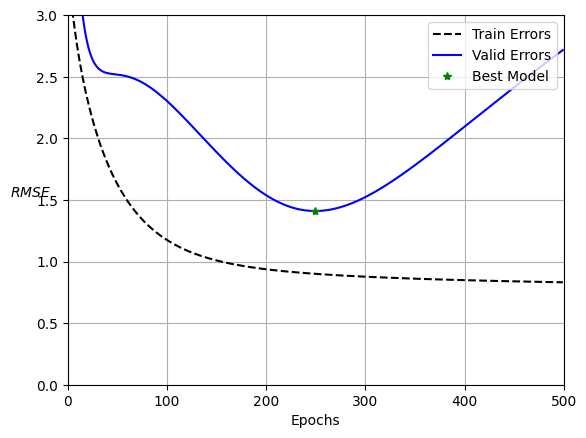

In [66]:
epochs = range(n_epochs)

plt.plot(epochs, train_errors, 'k--', label='Train Errors')
plt.plot(epochs, val_errors, 'b-', label='Valid Errors')
plt.plot(best_epoch, best_val_rmse, 'g*', label='Best Model')

plt.axis([0, 500, 0, 3])
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('$RMSE$', rotation=0)
plt.xlabel('Epochs')
plt.show()

## Logistic Regression

### Estimating Probabilities

* Logistic Regression model estimated probability (vector form) $\hat{p} = h_\theta(x) = \sigma(\theta^T.x)$
* Logistic function: $\sigma(t) = \frac{1}{1 + exp^{-t}}$

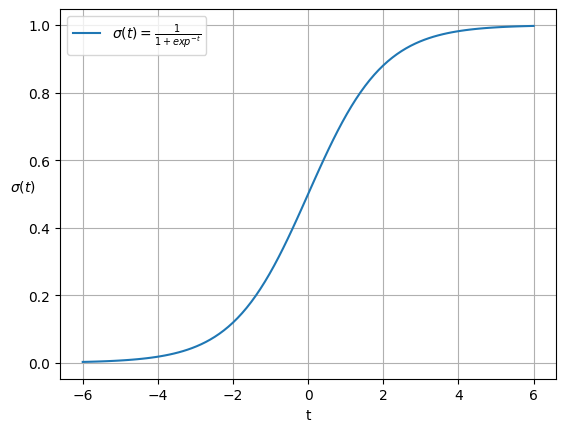

In [86]:
t = np.linspace(-6, 6, 100)
plt.plot(t, 1 / (1 + np.exp(-t)), label=r"$\sigma(t) = \frac{1}{1 + exp^{-t}}$")
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel(r"$\sigma(t)$", rotation=0)
plt.show()

Logistic Regression model prediction using a 50% threshold probability.
$$
\hat{y} = \begin{cases} 0 & \text{if } \hat{p} < 0.5 \\ 1 & \text{if } \hat{p} \geq 0.5 \end{cases}
$$
.

* $\sigma(t) < 0.5 \text{ if } t < 0$
* $\sigma(t) \geq 0.5 \text{ if } t \geq 0$
* $t = \theta^{T} x$

### Training and cost func

* Cost func of single training instance
$C(\theta)=\begin{cases}-log(\hat{p})&if~y=1\\ -log(1-\hat{p})&if~y=0\end{cases}$

* The cost function over the whole training set is the average cost over all training
instances

* Logistic Regression Cost Func 
$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]$

* The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal equation).
But the good news is that this cost function is convex, so gradient descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the
learning rate is not too large and you wait long enough). The partial derivatives of the
cost function with regard to the $j^{th}$ model parameter $θ^{th}$
$\frac{\partial}{\partial\theta_{j}}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^{T}x^{(i)})-y^{(i)})x_{j}^{(i)}$

### Decision Boundaries

In [96]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [97]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [98]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [100]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [114]:
X = iris.data[["petal width (cm)"]].to_numpy()
y = iris.target_names[iris.target] == 'virginica'
X[:2], y[:2]

(array([[0.2],
        [0.2]]),
 array([False, False]))

In [115]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, random_state=42)

In [116]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)